In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Tata_Motors_Ltd._historical_data.csv')

# Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
close_data = data[['Adj Close']]

# Normalize the 'Adj Close' values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

# Split into training (80%) and testing (20%)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Function to create sequences of 60 days
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# Create training and testing sequences
time_step = 60
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

# Reshape input for LSTM 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()

# LSTM layers with Dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Make predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Inverse transform the test data for comparison
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/50


C:\Users\Yuvan Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0310 - val_loss: 0.0018
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0014 - val_loss: 9.4806e-04
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0014 - val_loss: 9.9311e-04
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0015 - val_loss: 9.2410e-04
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0013 - val_loss: 9.1748e-04
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0012 - val_loss: 9.5369e-04
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0011 - val_loss: 7.8845e-04
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0012 - val_loss: 7.8305e-04
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms

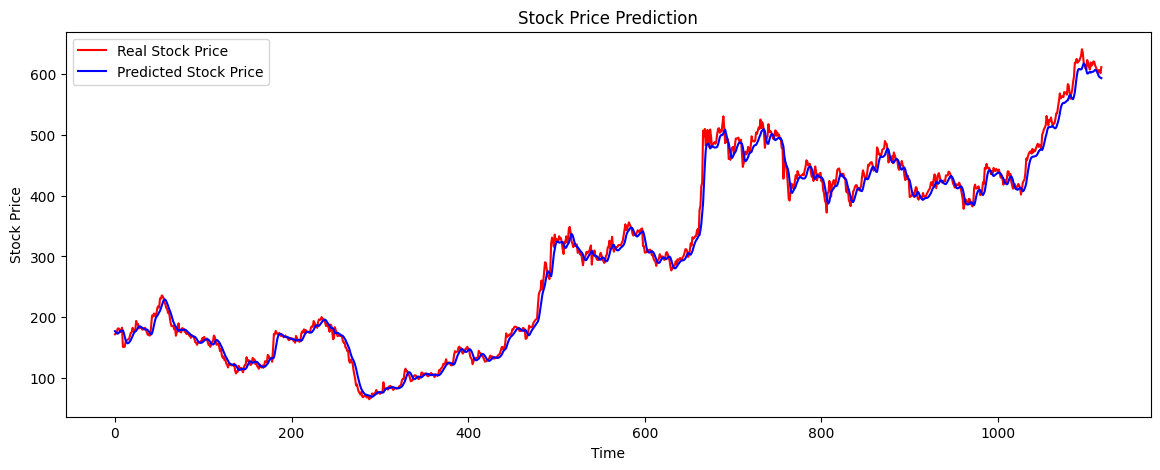

In [27]:
# Plot the results
plt.figure(figsize=(14,5))
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [28]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
rmse = math.sqrt(mse)
mae = mean_absolute_error(real_stock_price, predicted_stock_price)

# Print accuracy metrics
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Root Mean Squared Error: 13.65180827375901
Mean Absolute Error: 9.188505073779387


In [29]:
from sklearn.metrics import r2_score

# Calculate R² and adjusted R²
r2 = r2_score(real_stock_price, predicted_stock_price)
n = len(y_test)
p = X_test.shape[1]  # Assuming the number of predictors is the time step length
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("R²:", r2)
print("Adjusted R²:", adjusted_r2)

R²: 0.9926452552400589
Adjusted R²: 0.9922277673634302


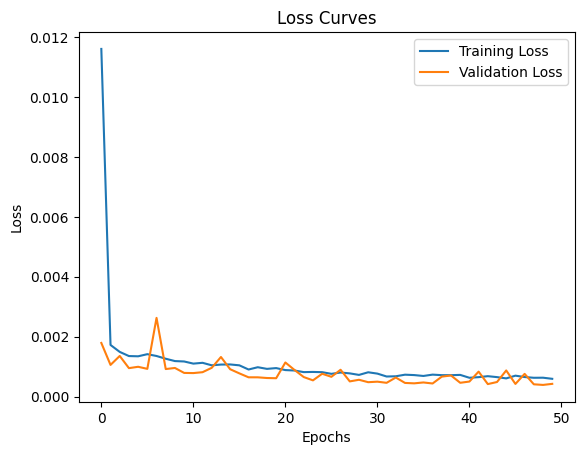

In [30]:
# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()